## Class 1
Revising basic pandas and seaborn  
Revising basic statistical tests  
Examining sources of error in data  

### How reliable is your data?

Measuring tree diamenter at breast height (DBH) is a standard ecological measurement.

Díaz, S., Kattge, J., Cornelissen, J. et al. The global spectrum of plant form and function. Nature 529, 167–171 (2016). https://doi.org/10.1038/nature16489
    
    
    


### Method. 
https://www.youtube.com/watch?v=JLc4UjOpC0s

Using a tape measure or string measure round each tree in the two lines of trees outside Ashworth.  
Note whether each tree is a sycamore (lobed leaves) or a beech (smooth margined leaves)  
https://www.woodlandtrust.org.uk/trees-woods-and-wildlife/british-trees/

Once all the trees have been measured by one person in the group, go round again with a second person measuring.   

### Data Entry. 
Make a python dataframe for your data from lists of tree number, row, species, DBH

In [2]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

Enter your data into python lists.

In [3]:
Tree = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Row = [1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2]
Species = ['s','s','s','s','s','b','b','b','b','b','s','s','s','s','s','b','b','b','b','b']
P_DBH = [161,139,148,174,107,217,210,219,418,238,134,145,167,122,123,243,256,212,180,190]
C_DBH = [162,142,147,175,107,200,206,220,272,233,134,153,166,123,130,256,220,215,178,185]

Combine lists into a dataframe

In [4]:
zipped = list(zip(Tree, Row, Species, P_DBH,C_DBH))
df = pd.DataFrame(zipped, columns=['Tree','Row', 'Species', 'P_DBH','C_DBH'])

We now have a pandas dataframe.  It has an index running along hte left hand, column names on the top.  There are useful fucntions for checkign adn summarising it.

#### Check things look right

In [49]:
df.shape

(20, 5)

In [50]:
df.head(3)

,Tree,Row,Species,P_DBH,C_DBH
0,1,1,s,161,162
1,2,1,s,139,142
2,3,1,s,148,147


Summarising

In [43]:
df.describe()

,Tree,Row,P_DBH,C_DBH
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,1.500000,190.150000,181.200000
std,5.91608,0.512989,69.267046,45.625016
min,1.00000,1.000000,107.000000,107.000000
25%,5.75000,1.000000,143.500000,145.750000
50%,10.50000,1.500000,177.000000,176.500000
75%,15.25000,2.000000,217.500000,216.250000
max,20.00000,2.000000,418.000000,272.000000


Each column in the dataframe is a series.  This is a bit like a python list, but has an order, index and, like dataframes, there are functions to describe and summarise them.  A sereis can be called in different ways.  It can be assigned to a variable:

In [5]:
P = df["P_DBH"]

In [6]:
max(P)

418

In [10]:
P.max()

418

Or called directly within a function, either explictly:

In [7]:
max(df["P_DBH"])

418

Or simply (if the column. name has no spaces, or odd characters)

In [8]:
max(df.P_DBH)

418

Other functions you can use to summarise a series:  
    
    P.min()
    P.mean()
    P.median()
    P.std()
    P.skew()
    P.quantile(0.5)
    P.nlargest(3)
    P.sample(2)
    P.head(3
    P.value_counts()
    
    

### Do we have reliable measures?

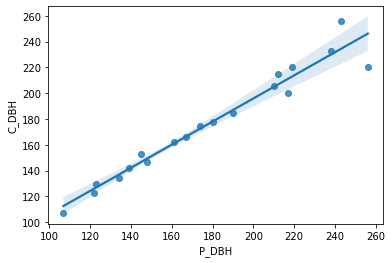

In [53]:
ax = sns.regplot(x="P_DBH", y="C_DBH", data=df)

We will exclude the outlier (low crown)

In [51]:
df = df[df.P_DBH < 400]

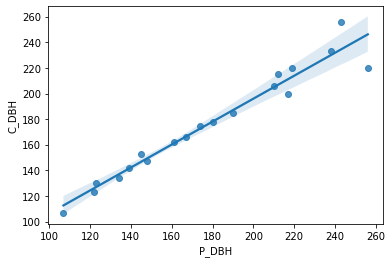

In [52]:
ax = sns.regplot(x="P_DBH", y="C_DBH", data=df)

Better!  
More variation on larger trees. 

Are there significant differeneces between the measures by each person?

#### Paired t test
Assumptions:  
Continous dependent variable  
Independant observations   
Normally distributed dependent variable (at least largely - the test is quite robust to this)  
No major outliers  

Check normalcy of data

<AxesSubplot:xlabel='P_DBH', ylabel='Count'>

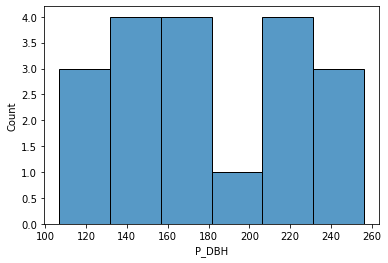

In [54]:
sns.histplot(data=df, x='P_DBH')

In [56]:
# test for P's measures
stat, p = shapiro(df['P_DBH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.957, p=0.518
Sample looks Gaussian (fail to reject H0)


<AxesSubplot:xlabel='C_DBH', ylabel='Count'>

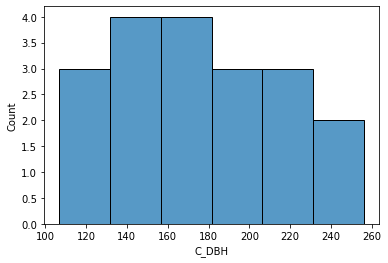

In [55]:
sns.histplot(data=df, x='C_DBH')

In [57]:
# test for C's measures
stat, p = shapiro(df['C_DBH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.976, p=0.884
Sample looks Gaussian (fail to reject H0)


In [58]:
stats.ttest_rel(df['C_DBH'], df['P_DBH'])

Ttest_relResult(statistic=-0.736166309298441, pvalue=0.47111523804332167)

Cannot reject the null hypothesis - the two sets of measurements are not significantly different

#### Average the two measurements

In [8]:
df['Av_DBH'] = df[['C_DBH','P_DBH']].mean(axis=1)

In [59]:
df.head(3)

,Tree,Row,Species,P_DBH,C_DBH,Av_DBH
0,1,1,Acer_pseudoplatanus,161,162,161.5
1,2,1,Acer_pseudoplatanus,139,142,140.5
2,3,1,Acer_pseudoplatanus,148,147,147.5


### Are the species different?

Give species names not letters

In [15]:
df['Species'] = df['Species'].replace({'s':'Acer_pseudoplatanus', 'b':'Fagus_sylvatica'})

In [16]:
df.groupby('Species').mean()

,Tree,Row,P_DBH,C_DBH,Av_DBH
Species,,,,,
Acer_pseudoplatanus,8.000000,1.500000,142.000000,143.900000,142.950000
Fagus_sylvatica,13.444444,1.555556,218.333333,212.555556,215.444444


<AxesSubplot:xlabel='Species', ylabel='Av_DBH'>

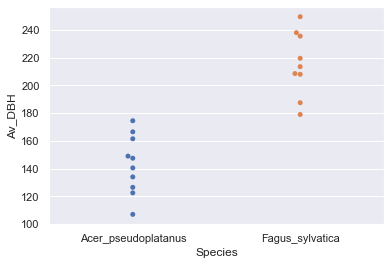

In [63]:
sns.swarmplot(x="Species", y="Av_DBH", data=df)

Are the DBH measures by species normally distributed?

In [22]:
beech = df[df.Species == "Fagus_sylvatica"]
maple = df[df.Species == "Acer_pseudoplatanus"]

<AxesSubplot:xlabel='Av_DBH', ylabel='Count'>

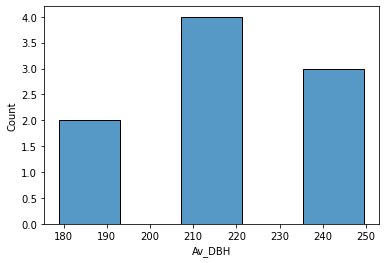

In [20]:
sns.histplot(data=beech, x='Av_DBH')

<AxesSubplot:xlabel='Av_DBH', ylabel='Count'>

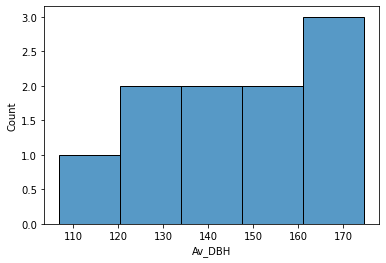

In [23]:
sns.histplot(data=maple, x='Av_DBH')

Don't look very normal.  Use the Shaprio-Wilkes test to check

In [25]:
# test for beech
stat, p = shapiro(beech['Av_DBH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.963, p=0.828
Sample looks Gaussian (fail to reject H0)


In [26]:
# ntest for maple
stat, p = shapiro(maple['Av_DBH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.982, p=0.976
Sample looks Gaussian (fail to reject H0)


With this confirmation that the DBH distributions are unlikely to be non-normal we'll use a t-test to see if the two species differ in DBH

### T-test

In [68]:
stats.ttest_ind(df['Av_DBH'][df['Species'] == 'Acer_pseudoplatanus'],
                df['Av_DBH'][df['Species'] == 'Fagus_sylvatica'])

Ttest_indResult(statistic=-7.1309619006666205, pvalue=1.6834757981392824e-06)

### Are the rows different?

In [64]:
df.groupby('Row').mean()

,Tree,P_DBH,C_DBH,Av_DBH
Row,,,,
1,5.111111,179.222222,176.888889,178.055556
2,15.500000,177.200000,176.000000,176.600000


<AxesSubplot:xlabel='Row', ylabel='Av_DBH'>

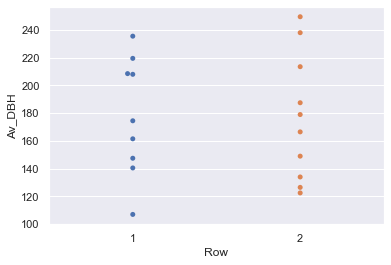

In [65]:
sns.swarmplot(x="Row", y="Av_DBH", data=df)


In [69]:
stats.ttest_ind(df['Av_DBH'][df['Row'] == 1],
                df['Av_DBH'][df['Row'] == 2])

Ttest_indResult(statistic=0.07167791278239664, pvalue=0.9436947593843594)